# Fingerprint-based similarity scores - switch to sparse scores!

## Challenge
Fixed-length fingerprints come with problem of bit collisions. This can be circumvented when using sparse vectors.

Data:

Compare multiple fingerprints on the "ms2 structures" dataset [Bushuiev 2024].

In [1]:
import os
from pathlib import Path
import pickle
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

ROOT = Path(os.getcwd()).parents[0]

path_data = os.path.join(Path(ROOT), "data")

In [2]:
filename = "compounds_unique_inchikey14.pickle"
compounds = pd.read_pickle(os.path.join(path_data, filename))
compounds.head()

,inchikey,inchi,smiles,spectrum_id
0,AAAQFGUYHFJNHI,InChI=1S/C22H22ClN5O2/c1-4-24-20(29)12-18-22-2...,CCNC(=O)C[C@@H]1N=C(c2ccc(Cl)cc2)c2c(ccc(OC)c2...,None
1,AABFWJDLCCDJJN,InChI=1S/C22H16N2O/c1-25-15-9-10-20-19(13-15)1...,COc1cc2c(cc1)[nH]c1c2ccnc1-c1cccc2ccccc12,None
2,AABILZKQMVKFHP,InChI=1S/C21H33NO8/c1-7-13(2)18(23)30-16-9-11-...,C/C=C(/C)\C(=O)O[C@H]1CC[N+]2([C@@H]1C(=CC2)CO...,MSBNK-NaToxAq-NA003250
3,AABUHSBGEIUSRJ,InChI=1S/C17H16N2O2/c1-13(20)18-15-8-10-16(11-...,CC(O)=Nc1ccc(NC(=O)C=Cc2ccccc2)cc1,CCMSLIB00010107357
4,AABUKWVVUWBZCS,InChI=1S/C21H14O3/c22-16-11-12-17-18(13-16)24-...,O=c1oc2cc(O)ccc2c(-c2ccccc2)c1-c1ccccc1,CCMSLIB00010104862


In [3]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdFingerprintGenerator

def calculate_mass(smiles):
    # Convert SMILES string to a molecule object
    molecule = Chem.MolFromSmiles(smiles)
    if molecule is None:
        return "Invalid SMILES"
    # Calculate the molecular mass
    mass = Descriptors.MolWt(molecule)
    return mass

In [4]:
masses = []
for smiles_string in tqdm(compounds.smiles):
    masses.append(calculate_mass(smiles_string))

  0%|          | 0/37663 [00:00<?, ?it/s]

In [5]:
compounds["mass"] = masses
compounds.head()

,inchikey,inchi,smiles,spectrum_id,mass
0,AAAQFGUYHFJNHI,InChI=1S/C22H22ClN5O2/c1-4-24-20(29)12-18-22-2...,CCNC(=O)C[C@@H]1N=C(c2ccc(Cl)cc2)c2c(ccc(OC)c2...,None,423.904
1,AABFWJDLCCDJJN,InChI=1S/C22H16N2O/c1-25-15-9-10-20-19(13-15)1...,COc1cc2c(cc1)[nH]c1c2ccnc1-c1cccc2ccccc12,None,324.383
2,AABILZKQMVKFHP,InChI=1S/C21H33NO8/c1-7-13(2)18(23)30-16-9-11-...,C/C=C(/C)\C(=O)O[C@H]1CC[N+]2([C@@H]1C(=CC2)CO...,MSBNK-NaToxAq-NA003250,427.494
3,AABUHSBGEIUSRJ,InChI=1S/C17H16N2O2/c1-13(20)18-15-8-10-16(11-...,CC(O)=Nc1ccc(NC(=O)C=Cc2ccccc2)cc1,CCMSLIB00010107357,280.327
4,AABUKWVVUWBZCS,InChI=1S/C21H14O3/c22-16-11-12-17-18(13-16)24-...,O=c1oc2cc(O)ccc2c(-c2ccccc2)c1-c1ccccc1,CCMSLIB00010104862,314.340


In [9]:
from utils import FingerprintGenerator, SparseFingerprintGenerator, compute_fingerprints
from metrics import ruzicka_similarity_matrix_sparse, jaccard_similarity_matrix_sparse

## Compute sparse fingerprints and scores

In [7]:
fpgen = rdFingerprintGenerator.GetMorganGenerator(radius=3, fpSize=4096)

fingerprints = compute_fingerprints(
    compounds, fpgen, count=True, sparse=True
)

100%|███████████████████████████████████| 37663/37663 [00:07<00:00, 5078.43it/s]


In [10]:
# this are now sparse fingerprints --> bits, counts
fingerprints[0]

(array([ 102572415,  129728088,  305720181,  381947833,  394944906,
         413522179,  422715066,  616028266,  658782932,  677115002,
         692354742,  717512901,  773607102,  775789760,  788012513,
         817799547,  824061994,  829754261,  847961216,  864674487,
         864942730,  878067945,  951226070,  969309216,  994485099,
        1016841875, 1334400161, 1352399629, 1414538737, 1475579790,
        1510328189, 1840994228, 1945433893, 2012777389, 2041434490,
        2076190208, 2092489639, 2170404731, 2245384272, 2246340824,
        2246699815, 2246728737, 2353112200, 2373046754, 2376939177,
        2401128110, 2497300032, 2591452236, 2604440622, 2700749481,
        2730429987, 2762810942, 2896319167, 2920190289, 2944555726,
        2969019787, 2971320646, 2976033787, 3044392905, 3064879565,
        3162837314, 3217380708, 3218693969, 3315826729, 3440517169,
        3452535345, 3458774156, 3463091208, 3467262120, 3542456614,
        3585989115, 3599391724, 3740751157, 3770

In [14]:
%%time

similarities_morgan3_count_sparse = ruzicka_similarity_matrix_sparse(fingerprints, fingerprints)

CPU times: user 14min 24s, sys: 7.44 s, total: 14min 31s
Wall time: 30.5 s


## Import already computed scores (not sparse!)

In [9]:
similarities_classic = np.load("similarities_tanimoto_rdkit_4096bits.npy")

In [12]:
similarities_morgan3_count = np.load("similarities_ruzicka_morgan3_4096bits.npy")

## Morgan-3 binary + Tanimoto

In [11]:
similarities_morgan3 = np.load("similarities_tanimoto_morgan3_4096bits.npy")

## Morgan-6 count

In [69]:
# too big! --> 5 GB !!
similarities_morgan6_count = np.load("similarities_ruzicka_morgan6_4096bits.npy",)

## Morgan-9 count

In [28]:
similarities_morgan9_count = np.load("similarities_ruzicka_morgan9_4096bits.npy")

## Adjust different score scales!

The two distributions above show that there is a huge discrepancy in how the scores are distributet. That also means: in how likely it is for a molecular pair to obtain a certain score!

**AIM**: bring all scores to the same overall distribution!?

### Adjust all to the same distribution --> use percentiles!

In [13]:
import numpy as np
from scipy.stats import rankdata


def percentile_scores(similarities: np.ndarray) -> np.ndarray:
    """
    Computes percentile ranks (0..100) for the unique upper-triangular (k=1) entries
    of a symmetrical similarity matrix using scipy's rankdata with average ranks.
    The results are then mirrored to the lower triangle so that the returned matrix
    is again symmetric.
    
    The diagonal is left as-is (default: 0.0), but you can adjust it if needed.

    Parameters
    ----------
    similarities : np.ndarray
        2D symmetric similarity matrix, shape (N, N).

    Returns
    -------
    np.ndarray
        A new matrix of the same shape, where the upper-triangular entries (and their
        mirrored lower-triangular counterparts) have been replaced by percentile ranks.
        The diagonal is untouched (default = 0).
    """
    # Step 1: Extract the upper-triangular entries (excluding diagonal)
    iu1 = np.triu_indices(similarities.shape[0], k=1)
    arr = similarities[iu1]

    # Step 2: Rank them using 'average' method (duplicates get same rank)
    ranks = rankdata(arr, method="average")  # Ranks in [1..len(arr)]
    
    # Step 3: Convert ranks to percentile range [0..100]
    percentiles = (ranks - 1) / (len(ranks) - 1) * 100 if len(ranks) > 1 else np.zeros_like(ranks)

    # Step 4: Create a new matrix for output, same shape and dtype
    percentile_matrix = np.zeros_like(similarities, dtype=float)
    
    # Step 5: Place the percentile scores back into the upper triangle
    percentile_matrix[iu1] = percentiles

    # Step 6: Mirror to the lower triangle
    percentile_matrix = percentile_matrix + percentile_matrix.T

    # Optionally, keep or modify the diagonal; default = 0.0
    # If you'd like to keep the original diagonal, uncomment this line:
    # np.fill_diagonal(percentile_matrix, np.diag(similarities))

    return percentile_matrix


In [16]:
%%time

scaled_similarities_morgan3_count_sparse = percentile_scores(similarities_morgan3_count_sparse)

CPU times: user 2min 28s, sys: 6.68 s, total: 2min 35s
Wall time: 2min 35s


In [19]:
similarities_morgan3_count_sparse.dtype, scaled_similarities_morgan3_count_sparse.dtype, similarities_morgan3_count.dtype

(dtype('float64'), dtype('float64'), dtype('float64'))

In [15]:
%%time

scaled_similarities_classic = percentile_scores(similarities_classic)

CPU times: user 1min 24s, sys: 6.36 s, total: 1min 31s
Wall time: 1min 31s


In [18]:
scaled_similarities_classic.shape, scaled_similarities_classic.dtype

((37663, 37663), dtype('float64'))

In [19]:
scaled_similarities_classic[:5, :5]

array([[ 0.        , 68.36077614, 87.90876007, 32.84831871, 68.65481527],
       [68.36077614,  0.        , 57.54425578, 20.41642739, 81.85514836],
       [87.90876007, 57.54425578,  0.        , 24.12357248, 59.24575117],
       [32.84831871, 20.41642739, 24.12357248,  0.        , 21.76288745],
       [68.65481527, 81.85514836, 59.24575117, 21.76288745,  0.        ]])

In [ ]:
%%time

scaled_similarities_morgan3 = percentile_scores(similarities_morgan3)

In [12]:
%%time

scaled_similarities_morgan3_count = percentile_scores(similarities_morgan3_count)

CPU times: user 2min 23s, sys: 6.83 s, total: 2min 30s
Wall time: 2min 30s


In [29]:
%%time

scaled_similarities_morgan9_count = percentile_scores(similarities_morgan9_count)

CPU times: user 2min 19s, sys: 6.71 s, total: 2min 26s
Wall time: 2min 26s


In [57]:
%%time

scaled_similarities_map4 = percentile_scores(similarities_map4)

CPU times: user 1min 32s, sys: 6.41 s, total: 1min 38s
Wall time: 1min 38s


In [58]:
#np.save("scaled_similarities_tanimoto_rdkit_4096bits.npy", scaled_similarities_classic.astype(np.float32))
#np.save("scaled_similarities_tanimoto_morgan3_4096bits.npy", scaled_similarities_morgan3.astype(np.float32))
#np.save("scaled_similarities_ruzicka_morgan3_4096bits.npy", scaled_similarities_morgan3_count.astype(np.float32))
#np.save("scaled_similarities_ruzicka_morgan9_4096bits.npy", scaled_similarities_morgan9_count.astype(np.float32))
#np.save("scaled_similarities_tanimoto_map4_4096bits.npy", scaled_similarities_map4.astype(np.float32))

In [24]:
#scaled_similarities_classic = np.load("scaled_similarities_tanimoto_rdkit_4096bits.npy")
#scaled_similarities_morgan3 = np.load("scaled_similarities_tanimoto_morgan3_4096bits.npy")
scaled_similarities_morgan3_count = np.load("scaled_similarities_ruzicka_morgan3_4096bits.npy")
#scaled_similarities_morgan9_count = np.load("scaled_similarities_ruzicka_morgan9_4096bits.npy")
#scaled_similarities_map4 = np.load("scaled_similarities_tanimoto_map4_4096bits.npy")

## Compare score vs. score using heatmap

In [21]:
from matplotlib.colors import LogNorm
import numpy as np
import matplotlib.pyplot as plt

def heatmap_comparison(similarities1, similarities2, label1, label2, bins=50,
                       colormap="viridis",
                       ignore_diagonal=True,
                       add_region_percentage=True,
                       filename=None):
    fig, ax = plt.subplots(figsize=(8, 8), dpi=300)
    
    # Compute the 2D histogram
    if ignore_diagonal:
        iu1 = np.triu_indices(similarities1.shape[0], k=1)
    else:
        iu1 = np.triu_indices(similarities1.shape[0], k=0)

    hist, x_edges, y_edges = np.histogram2d(
        similarities1[iu1], 
        similarities2[iu1], 
        bins=bins
    )
    
    # Display the heatmap using imshow with logarithmic color scale
    im = ax.imshow(hist.T, origin='lower', aspect='equal',
                   extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]],
                   cmap=colormap, norm=LogNorm(vmin=1, vmax=np.max(hist)))
    
    # Add colorbar with proper tick formatting
    cb = fig.colorbar(im, ax=ax)
    cb.set_label('Count')

    total_sum = iu1[0].shape[0]

    # Add text annotations for each 5x5 square
    step = bins // 5
    for i in range(0, bins, step):
        for j in range(0, bins, step):
            # Compute the sum of the elements in the 5x5 square
            sub_matrix = hist[i:i+step, j:j+step]
            subsection_sum = np.sum(sub_matrix)
            
            # Compute the center of the square for placing the text
            x_center = (x_edges[i] + x_edges[i + step]) / 2
            y_center = (y_edges[j] + y_edges[j + step]) / 2
            
            # Add the text to the plot
            if subsection_sum > 0 and add_region_percentage:
                ax.text(x_center, y_center, f"{(100 * subsection_sum / total_sum):.2f}%", color="white", 
                        ha="center", va="center", fontsize=6, zorder=2)
    
    # Add grid and labels
    ax.grid(True, zorder=1)
    ax.set_xlabel(label1)
    ax.set_ylabel(label2)
    
    plt.tight_layout()
    if filename is not None:
        plt.savefig(filename)
    plt.show()

## Direct Score Comparisons

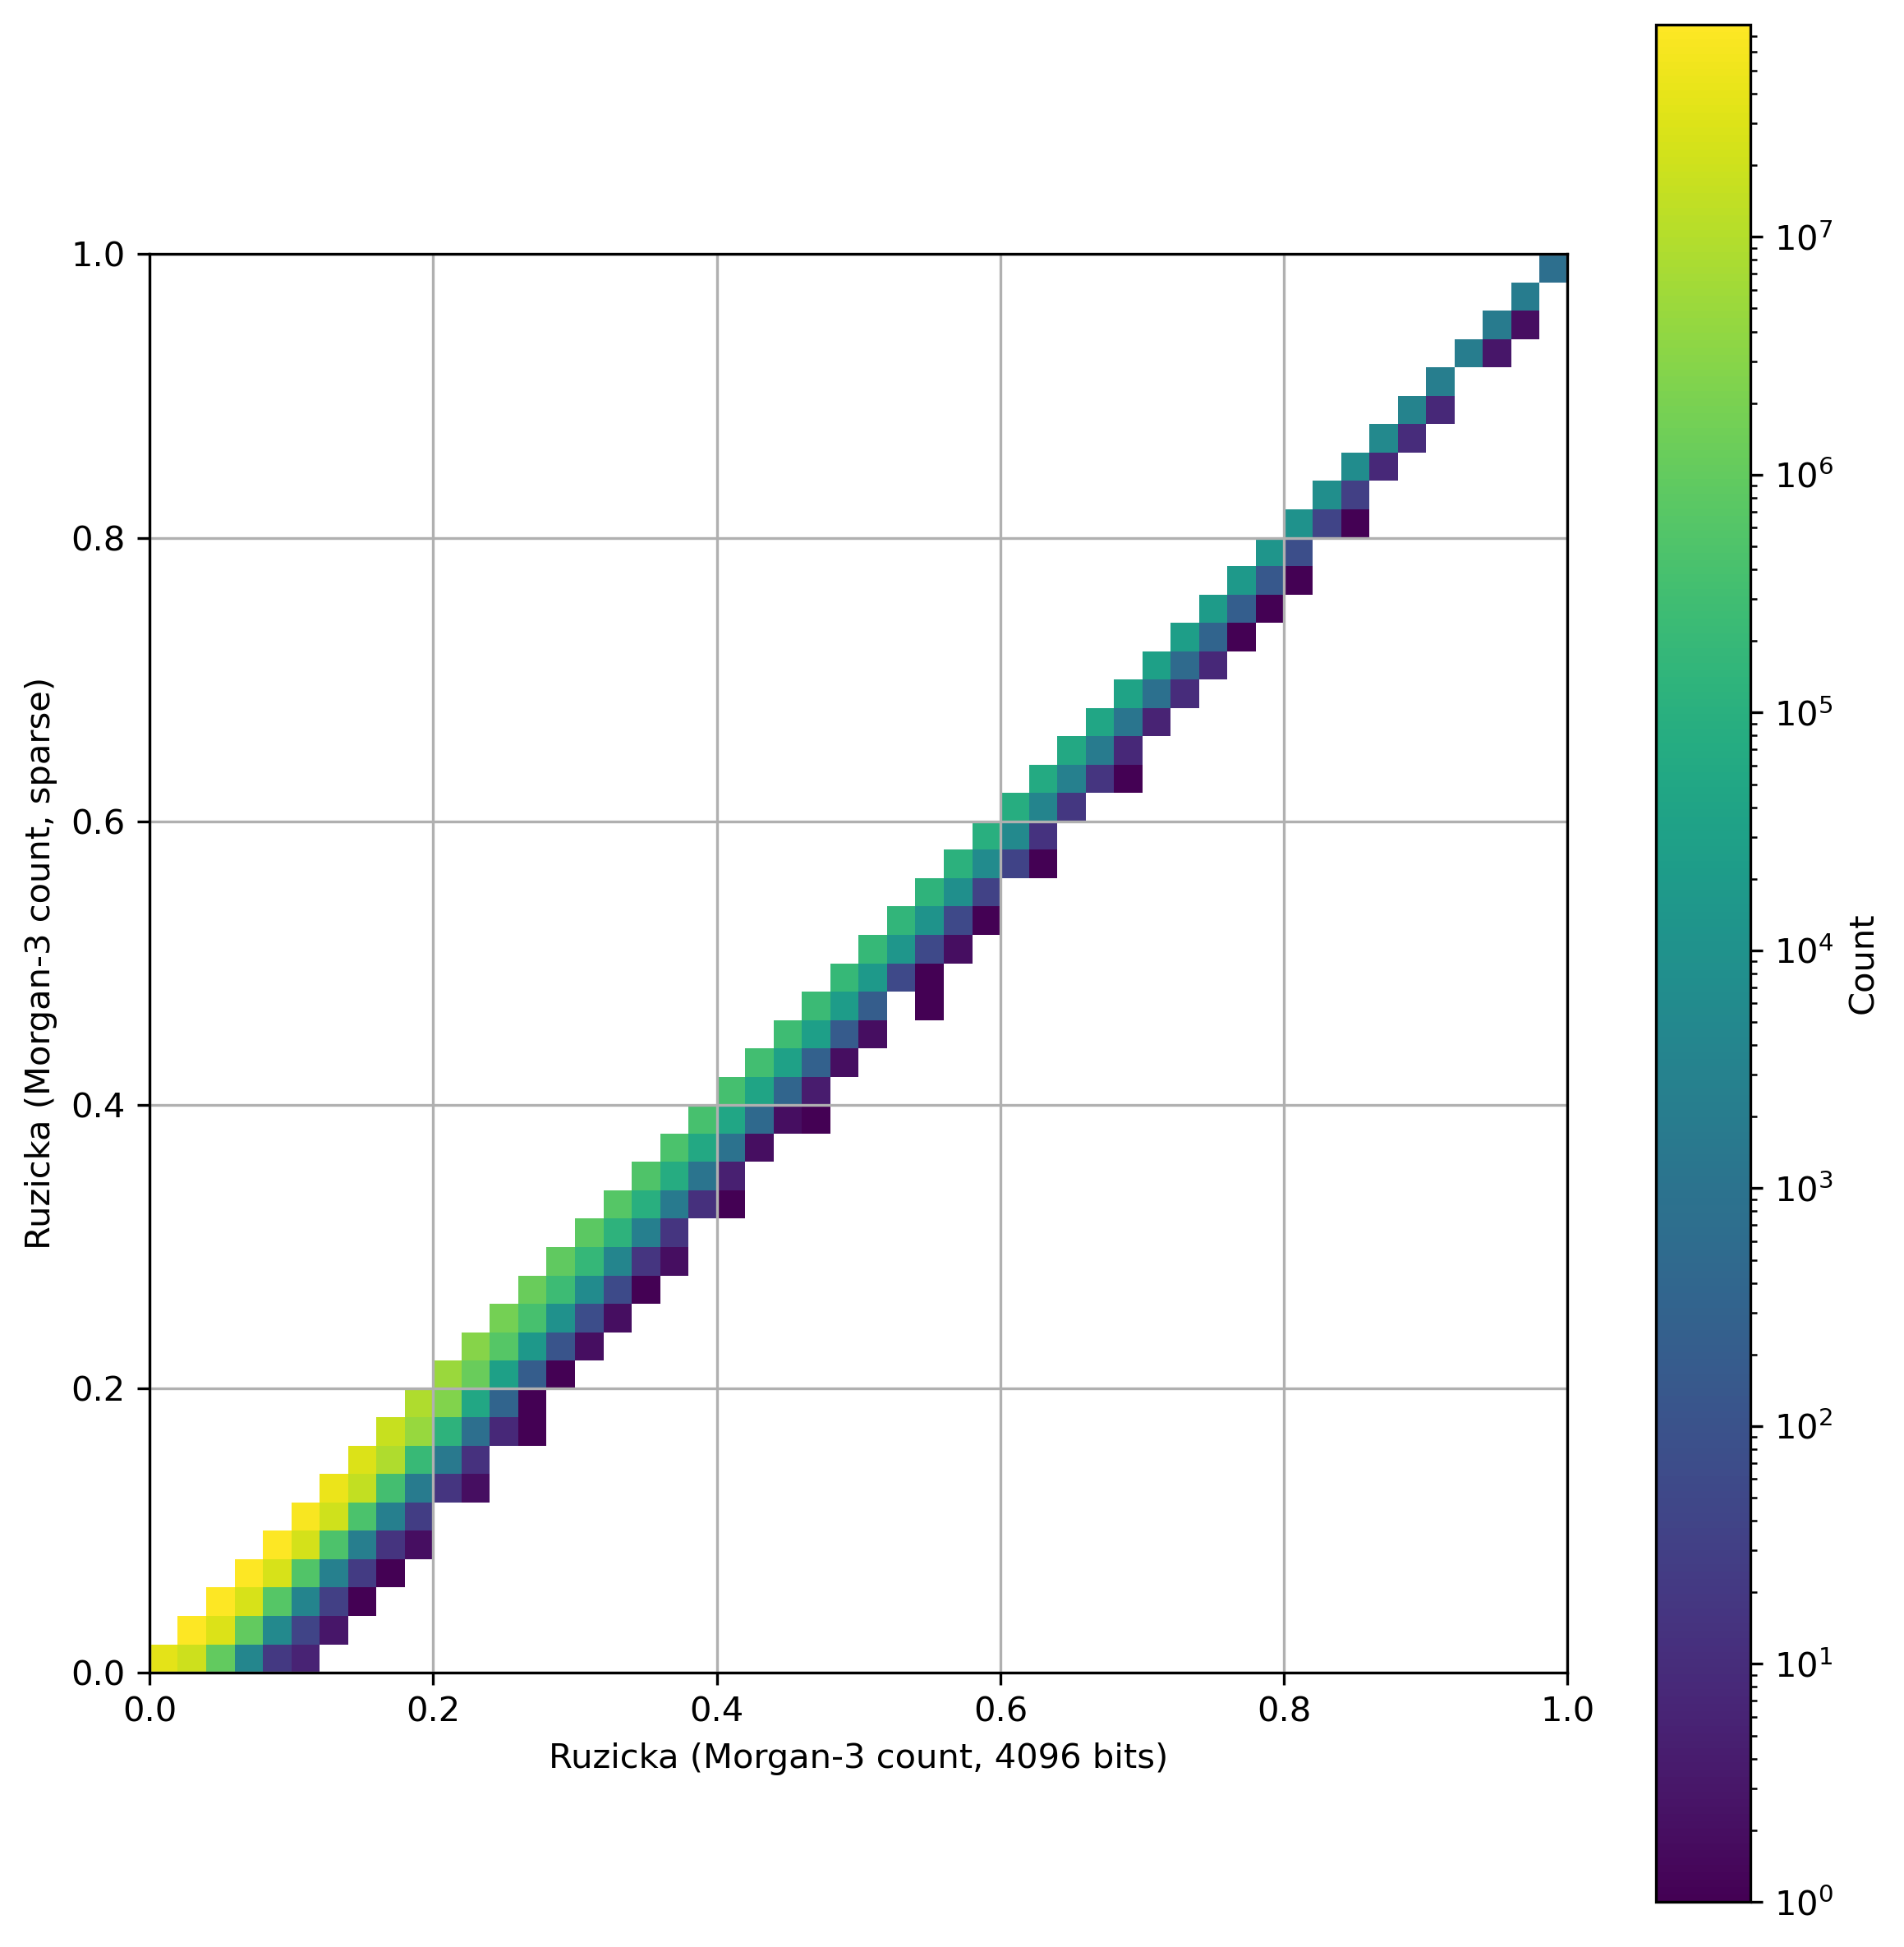

In [30]:
NBITS = 4096

heatmap_comparison(
    similarities_morgan3_count,
    similarities_morgan3_count_sparse,
    f"Ruzicka (Morgan-3 count, {NBITS} bits)",
    f"Ruzicka (Morgan-3 count, sparse)",
    bins=50,
    #colormap="inferno",
    add_region_percentage=False,
    filename="heatmap_ruzicka_morgan3_vs_sparse.png"
)

## Score Percentile Comparisons

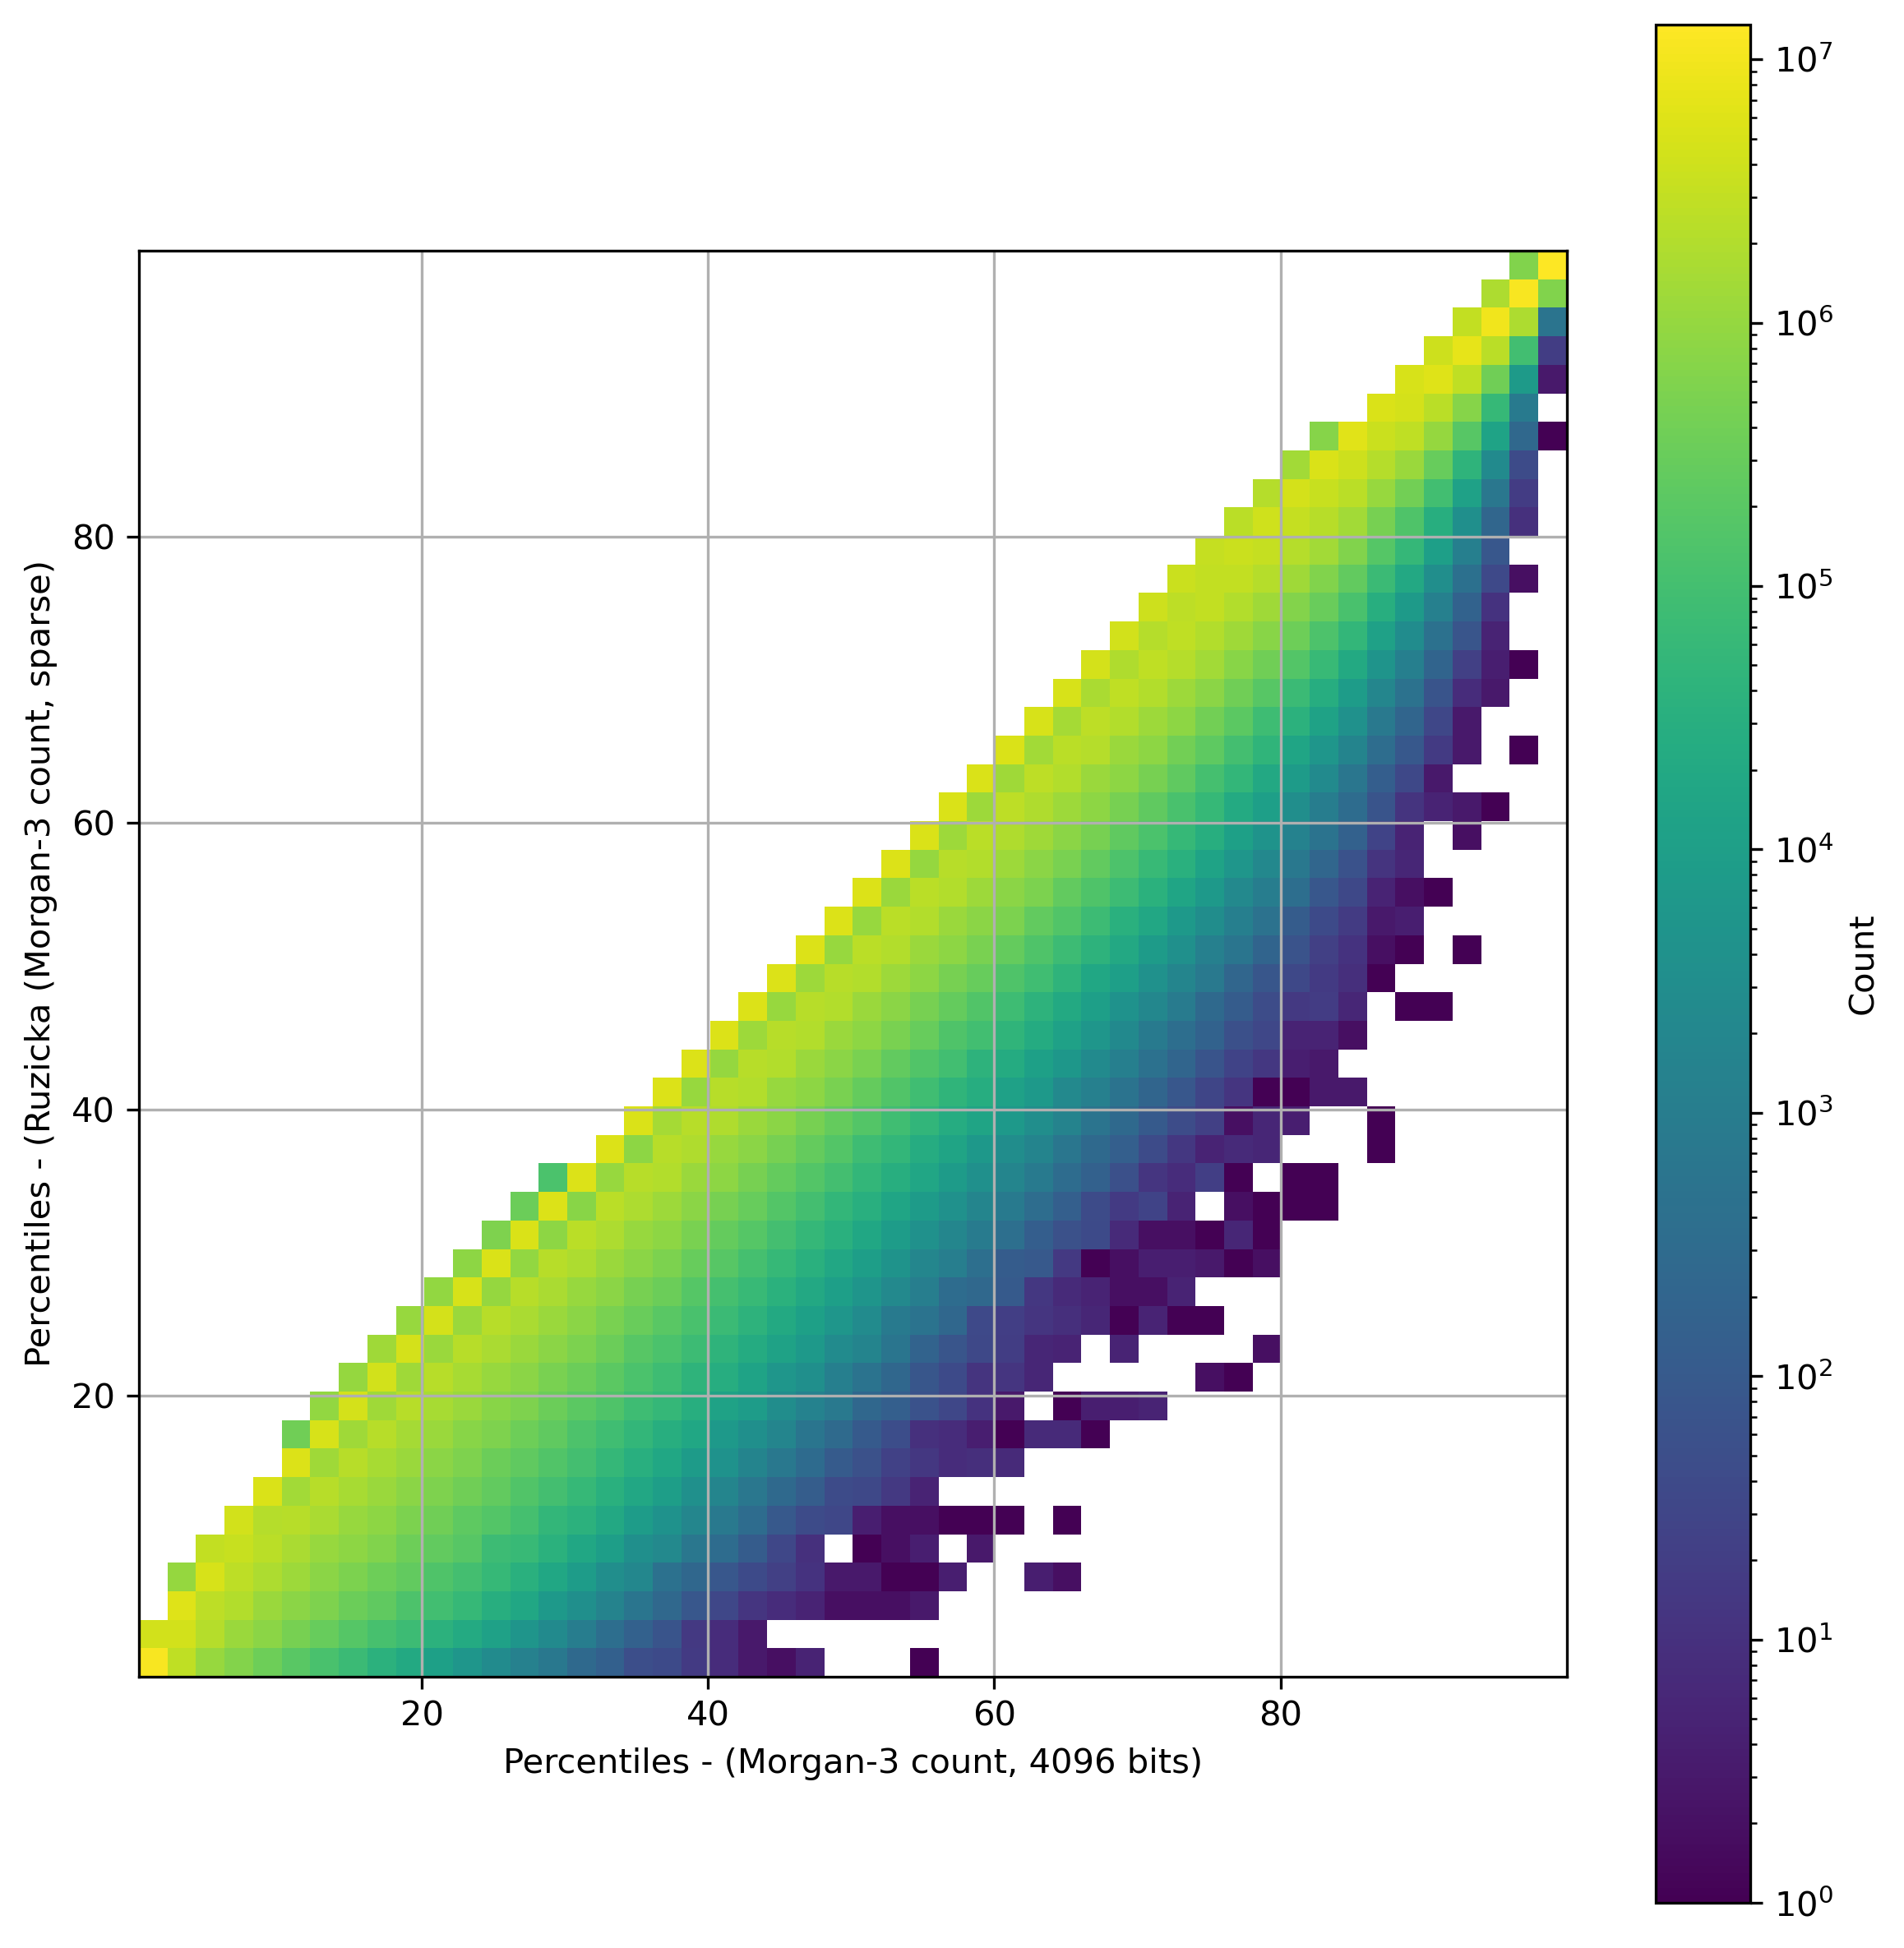

In [25]:
NBITS = 4096

heatmap_comparison(
    scaled_similarities_morgan3_count,
    scaled_similarities_morgan3_count_sparse,
    f"Percentiles - (Morgan-3 count, {NBITS} bits)",
    f"Percentiles - (Ruzicka (Morgan-3 count, sparse)",
    bins=50,
    #colormap="inferno",
    add_region_percentage=False,
    filename="heatmap_scaled_ruzicka_morgan3_vs_sparse.png"
)

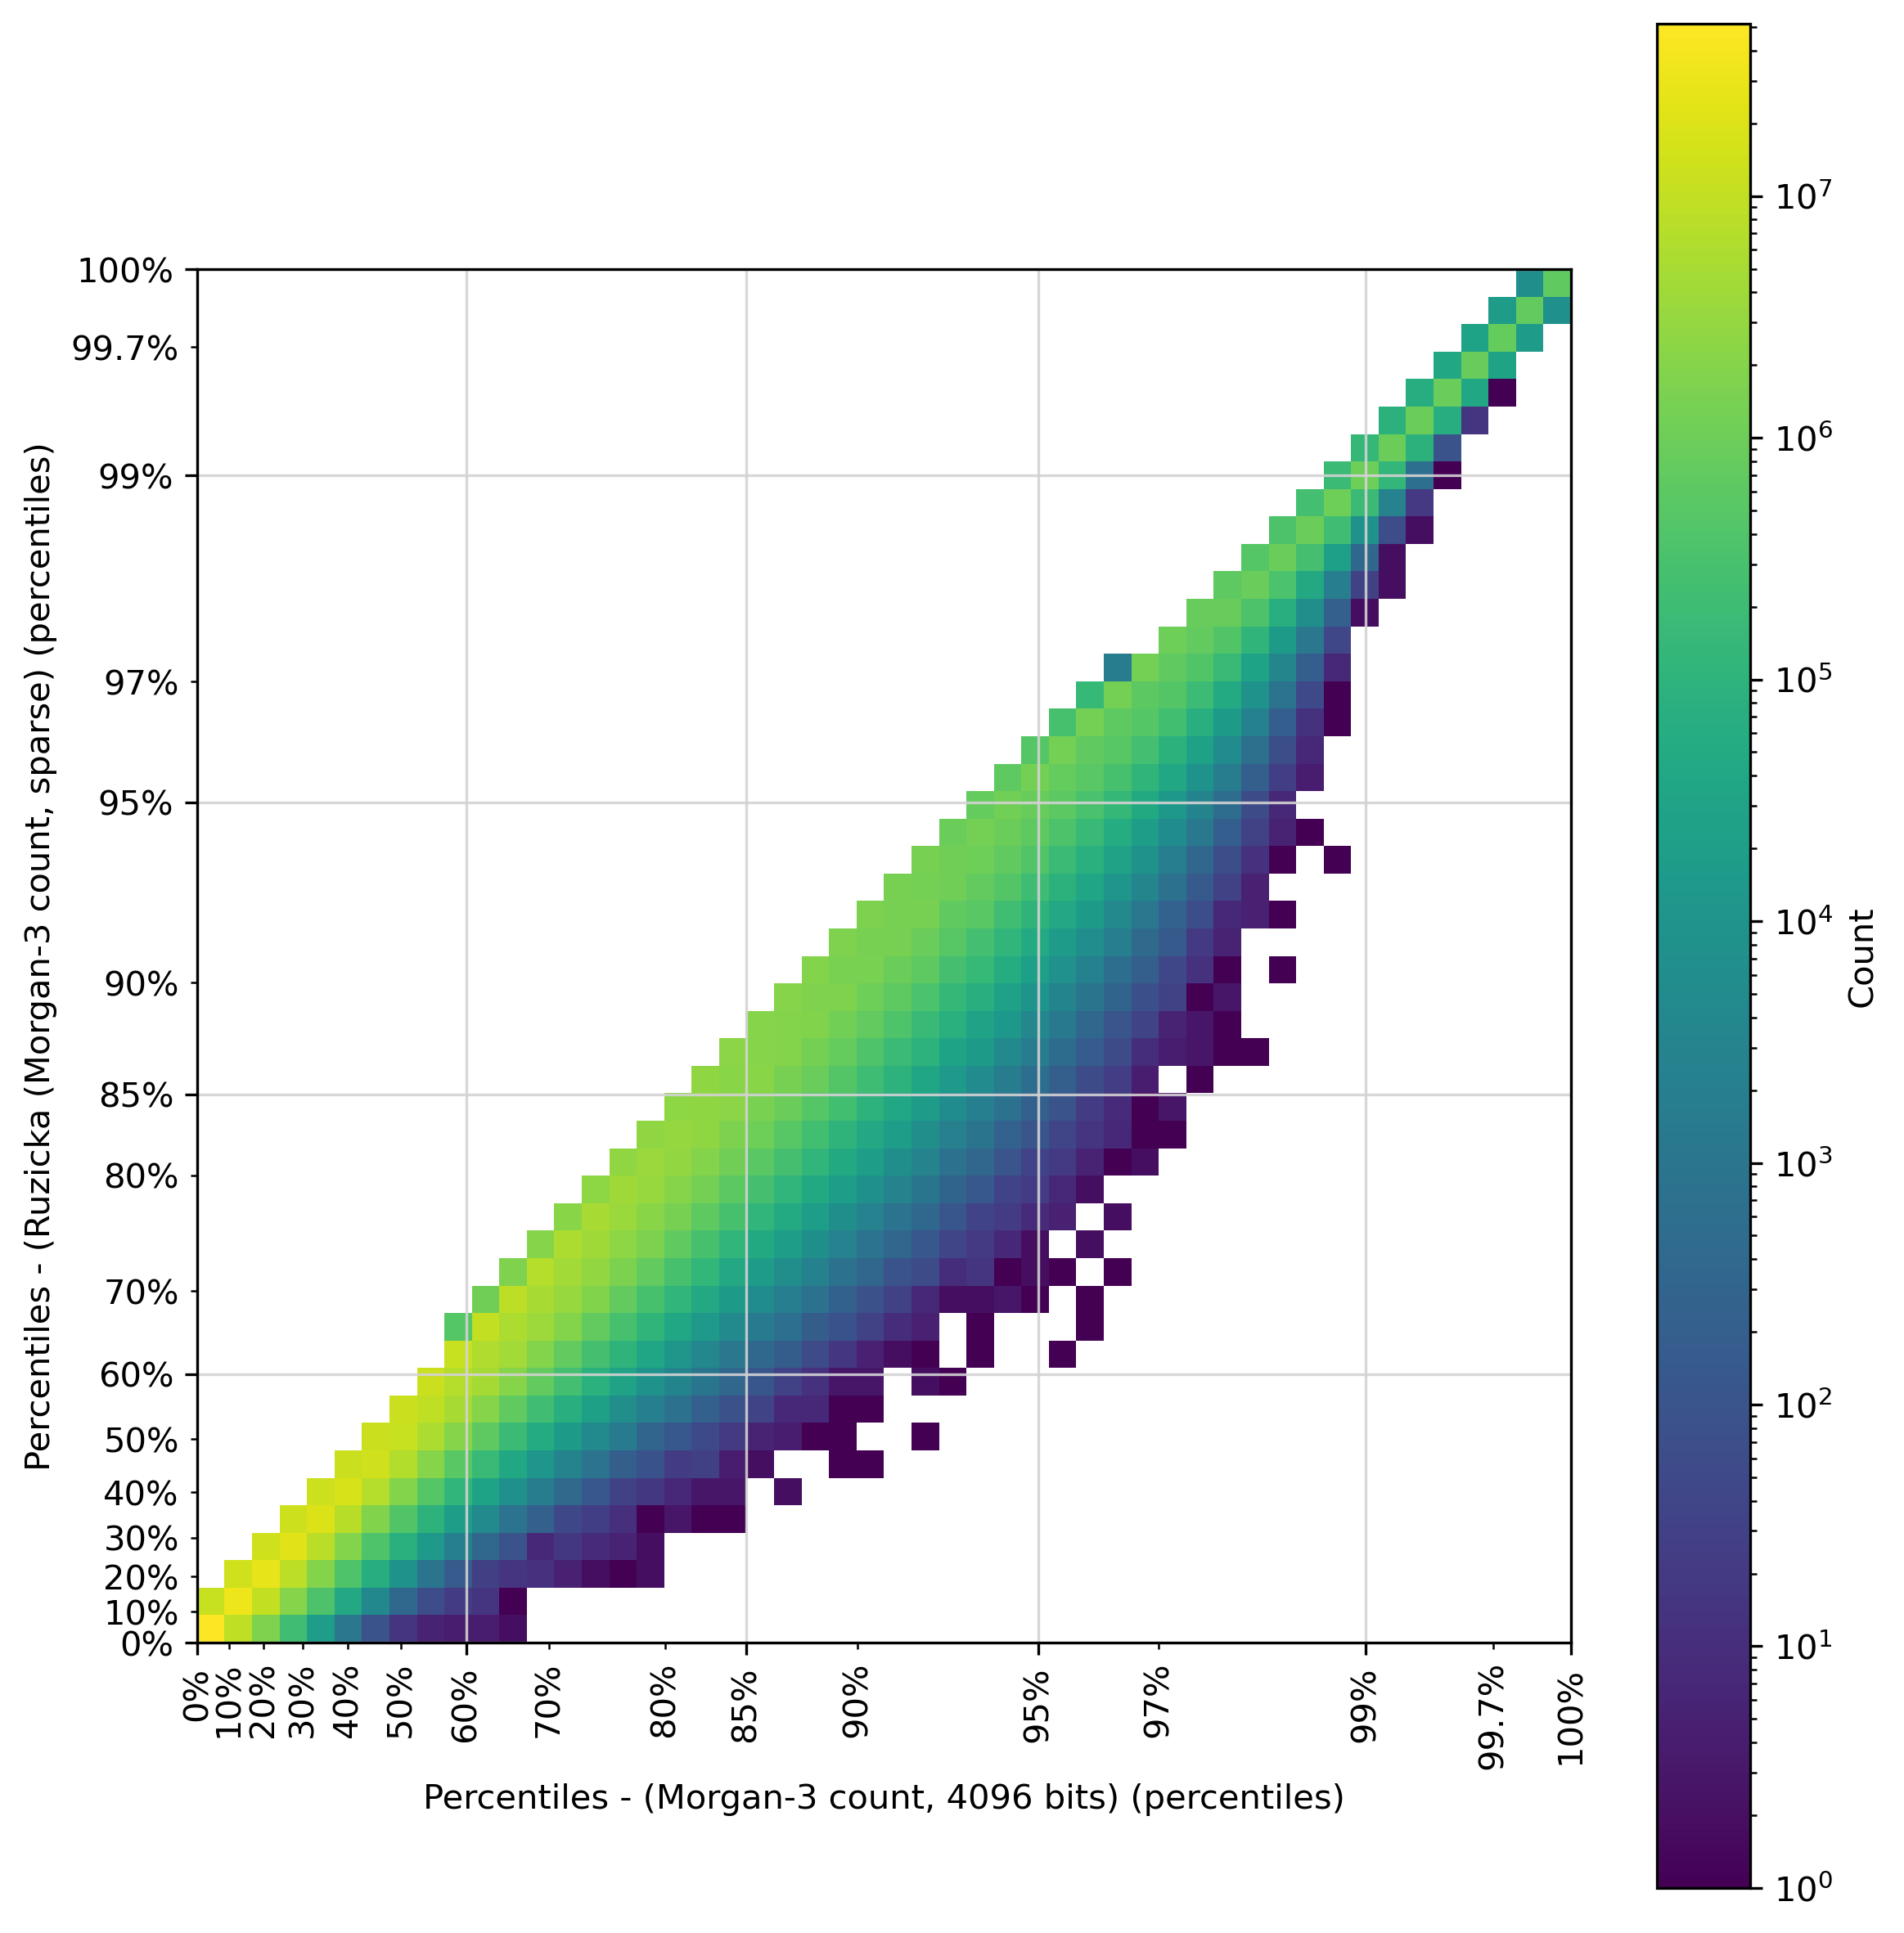

In [31]:
heatmap_comparison_scaled_bins(
    scaled_similarities_morgan3_count, #[:10_000, :10_000],
    scaled_similarities_morgan3_count_sparse, #[:10_000, :10_000],
    f"Percentiles - (Morgan-3 count, {NBITS} bits)",
    f"Percentiles - (Ruzicka (Morgan-3 count, sparse)",
    bins=50,
    #colormap="inferno",
    add_region_percentage=False,
    filename="heatmap_scaled_ruzicka_morgan3_vs_sparse.png"
)

In [98]:
from matplotlib.colors import LogNorm
import numpy as np
import matplotlib.pyplot as plt

def heatmap_comparison(similarities1, similarities2, label1, label2, bins=50,
                       colormap="viridis",
                       ignore_diagonal=True,
                       filename=None):
    fig, ax = plt.subplots(figsize=(8, 8), dpi=300)
    
    # Compute the 2D histogram
    if ignore_diagonal:
        iu1 = np.triu_indices(similarities1.shape[0], k=1)
    else:
        iu1 = np.triu_indices(similarities1.shape[0], k=0)

    hist, x_edges, y_edges = np.histogram2d(
        similarities1[iu1], 
        similarities2[iu1], 
        bins=bins
    )
    
    # Display the heatmap using imshow with logarithmic color scale
    im = ax.imshow(hist.T, origin='lower', aspect='equal',
                   extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]],
                   cmap=colormap, norm=LogNorm(vmin=1, vmax=np.max(hist)))
    
    # Add colorbar with proper tick formatting
    cb = fig.colorbar(im, ax=ax)
    cb.set_label('Count')

    total_sum = iu1[0].shape[0]

    # Add text annotations for each 5x5 square
    step = bins // 5
    for i in range(0, bins, step):
        for j in range(0, bins, step):
            # Compute the sum of the elements in the 5x5 square
            sub_matrix = hist[i:i+step, j:j+step]
            subsection_sum = np.sum(sub_matrix)
            
            # Compute the center of the square for placing the text
            x_center = (x_edges[i] + x_edges[i + step]) / 2
            y_center = (y_edges[j] + y_edges[j + step]) / 2
            
            # Add the text to the plot
            if subsection_sum > 0:
                ax.text(x_center, y_center, f"{(100 * subsection_sum / total_sum):.2f}%", color="white", 
                        ha="center", va="center", fontsize=6, zorder=2)
    
    # Add grid and labels
    ax.grid(True, zorder=1)
    ax.set_xlabel(label1)
    ax.set_ylabel(label2)
    
    plt.tight_layout()
    if filename is not None:
        plt.savefig(filename)
    plt.show()

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

###############################################################################
# 1) A helper to create non-uniform bin edges (finer near 100%)
###############################################################################
def make_scaled_bin_edges(num_bins=50, epsilon=0.01):
    """
    Return a non-uniform array of bin edges in [0,100],
    which is denser near the top (100%).
    """
    def forward_transform(p):
        # p in [0,100] -> log-like transform
        p_clipped = np.clip(p, 0, 100) / 100.0
        return -np.log((1.0 + epsilon) - p_clipped)
    
    def inverse_transform(x):
        # x -> p in [0,100]
        return 100.0 * ((1.0 + epsilon) - np.exp(-x))

    t_min = forward_transform(0)     # -log(1+epsilon)
    t_max = forward_transform(100)   # -log(epsilon)

    t_values = np.linspace(t_min, t_max, num_bins + 1)
    p_edges = inverse_transform(t_values)
    return p_edges

###############################################################################
# 2) A helper to convert a desired percentile p in [0,100] to the uniform
#    coordinate [0..1], given the non-uniform bin edges.
###############################################################################
def percentile_to_uniform(p, edges):
    """
    Given a desired percentile p in [0,100], find its 'uniform coordinate' 
    in [0,1] based on the non-uniform bin edges array (length = bins+1).

    - edges[i], edges[i+1] define the percentile range for bin i.
    - If p is in [edges[i], edges[i+1]), we place it proportionally
      within bin i in [0..1].
    """
    # Find the bin index where p belongs
    i = np.searchsorted(edges, p, side='right') - 1
    # Clamp i to [0, len(edges)-2]
    i = max(0, min(i, len(edges) - 2))
    
    # Fractional offset within that bin
    bin_left = edges[i]
    bin_right = edges[i+1]
    width = max(bin_right - bin_left, 1e-12)
    frac = (p - bin_left) / width
    
    # Normalize to [0..1] across all bins
    x_uni = (i + frac) / (len(edges) - 1)
    return x_uni

###############################################################################
# 3) The main function
###############################################################################
def heatmap_comparison_scaled_bins(similarities1, similarities2, 
                                   label1, label2,
                                   bins=50, colormap="viridis",
                                   ignore_diagonal=True, epsilon=0.01,
                                   add_region_percentage=True,
                                   filename=None):
    """
    similarities1, similarities2: 2D arrays of shape (N, N) in [0,100] (percentiles).
    We'll:
      - Bin with non-uniform edges (finer near 100%).
      - Plot via imshow in uniform 0..1 space (each bin = same size).
      - Then define major percentile intervals, sum those big boxes, and label them.
      - Add major ticks (labeled) and minor ticks (unlabeled) accordingly.
    """
    fig, ax = plt.subplots(figsize=(8, 8), dpi=300)

    # -------------------------------------------------------------------------
    # 1) Data selection
    # -------------------------------------------------------------------------
    n = similarities1.shape[0]
    if ignore_diagonal:
        iu1 = np.triu_indices(n, k=1)
    else:
        iu1 = np.triu_indices(n, k=0)
    
    # -------------------------------------------------------------------------
    # 2) Non-uniform bin edges + histogram
    # -------------------------------------------------------------------------
    x_edges = make_scaled_bin_edges(num_bins=bins, epsilon=epsilon)  # length = bins+1
    y_edges = make_scaled_bin_edges(num_bins=bins, epsilon=epsilon)  # length = bins+1
    
    hist, _, _ = np.histogram2d(
        similarities1[iu1],
        similarities2[iu1],
        bins=[x_edges, y_edges]
    )
    
    # -------------------------------------------------------------------------
    # 3) Plot the heatmap in [0..1] x [0..1]
    # -------------------------------------------------------------------------
    im = ax.imshow(
        hist.T,
        origin='lower',
        aspect='equal',
        extent=[0, 1, 0, 1],
        cmap=colormap,
        norm=LogNorm(vmin=1, vmax=hist.max() if hist.max() > 0 else 1)
    )
    cb = fig.colorbar(im, ax=ax)
    cb.set_label("Count")

    # -------------------------------------------------------------------------
    # 4) Define major intervals & label each box's fraction
    #    Example: [0, 50, 80, 95, 99, 100]
    # -------------------------------------------------------------------------
    major_percentiles = [0, 60, 85, 95, 99, 100]
    total_sum = hist.sum()
    
    # Convert major cutoffs to uniform space
    x_major_coords = [percentile_to_uniform(p, x_edges) for p in major_percentiles]
    y_major_coords = [percentile_to_uniform(p, y_edges) for p in major_percentiles]
    
    # Compute percentages for different subsections
    for ix in range(len(major_percentiles) - 1):
        x_lo_uni = x_major_coords[ix]
        x_hi_uni = x_major_coords[ix + 1]
    
    def coord_to_bin_idx(u):
        """Convert a uniform coordinate in [0..1] to a histogram bin index [0..bins)."""
        # e.g. u=0.3 => bin 15 if bins=50
        idx = int(np.floor(u * bins))
        # clamp
        return max(0, min(idx, bins - 1))

    for ix in range(len(major_percentiles) - 1):
        x_low = x_major_coords[ix]
        x_high = x_major_coords[ix + 1]
        
        x_lo_bin = major_percentiles[ix]
        x_hi_bin = major_percentiles[ix + 1]
        if x_lo_bin == 0:
            x_lo_bin = - 0.00001
        
        for iy in range(len(major_percentiles) - 1):
            y_low = y_major_coords[iy]
            y_high = y_major_coords[iy + 1]

            y_lo_bin = major_percentiles[iy]
            y_hi_bin = major_percentiles[iy + 1]
            if y_lo_bin == 0:
                y_lo_bin = - 0.00001
            sub_matrix = np.where(
                (similarities1[iu1] > x_lo_bin) & (similarities1[iu1] <= x_hi_bin) \
                & (similarities2[iu1] > y_lo_bin) & (similarities2[iu1] <= y_hi_bin)
            )[0]
            sub_sum = sub_matrix.shape[0]
            if sub_sum > 0 and add_region_percentage:
                fraction = 100.0 * sub_sum / total_sum
                # Place text at the center of the big box
                x_center = 0.5 * (x_low + x_high)
                y_center = 0.5 * (y_low + y_high)
                
                ax.text(
                    x_center, y_center,
                    f"{fraction:.2f}%", color="white",
                    ha="center", va="center", fontsize=6
                )

    # -------------------------------------------------------------------------
    # 5) Axis Ticks: major vs. minor
    #    For example:
    #      major: [0, 50, 80, 95, 99, 100]
    #      minor: [0,10,20,30,40,50,60,70,80,90,95,99,100]
    # -------------------------------------------------------------------------
    minor_percentiles = [0,10,20,30,40,50,60,70,80,85,90,95,97,99,99.7,100]
    
    # Convert to uniform space
    x_major_pos = [percentile_to_uniform(p, x_edges) for p in major_percentiles]
    y_major_pos = [percentile_to_uniform(p, y_edges) for p in major_percentiles]
    x_minor_pos = [percentile_to_uniform(p, x_edges) for p in minor_percentiles]
    y_minor_pos = [percentile_to_uniform(p, y_edges) for p in minor_percentiles]
    
    # Set major ticks
    ax.set_xticks(x_major_pos, minor=False)
    ax.set_yticks(y_major_pos, minor=False)
    ax.set_xticklabels([f"{p}%" for p in major_percentiles], minor=False, rotation=90)
    ax.set_yticklabels([f"{p}%" for p in major_percentiles], minor=False)
    
    # Set minor ticks
    ax.set_xticks(x_minor_pos, minor=True)
    ax.set_yticks(y_minor_pos, minor=True)
    ax.set_xticklabels([f"{p}%" for p in minor_percentiles], minor=True, rotation=90)
    ax.set_yticklabels([f"{p}%" for p in minor_percentiles], minor=True)
    
    # Optionally turn on grid lines
    ax.grid(which='major', color='lightgray', linestyle='-', linewidth=0.8, alpha=0.9)
    #ax.grid(which='minor', color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
    
    # Labels
    ax.set_xlabel(label1 + " (percentiles)")
    ax.set_ylabel(label2 + " (percentiles)")
    
    plt.tight_layout()
    if filename:
        plt.savefig(filename)
    plt.show()


## Find examples to illustrate regions

In [32]:
def get_score_summary(id1, id2):
    scores = {
        #"Scaled Tanimoto (rdkit binary fp)": scaled_similarities_classic[id1, id2],
        #"Scaled Tanimoto (Morgan-3 binary fp)": scaled_similarities_morgan3[id1, id2],
        #"Scaled Tanimoto (MAP4 fp)": scaled_similarities_map4[id1, id2],
        "Scaled Ruzicka (Morgan-3 count, 4096-bit fp)": scaled_similarities_morgan3_count[id1, id2],
        "Scaled Ruzicka (Morgan-3 count, sparse fp)": scaled_similarities_morgan3_count_sparse[id1, id2],
        #"Scaled Ruzicka (Morgan-9 count fp)": scaled_similarities_morgan9_count[id1, id2],
    }
    scores = pd.DataFrame.from_dict(scores, orient='index', columns=["Score"])
    return scores

In [33]:
def show_pairs(unique_pairs):
    for pair in unique_pairs:
        display(get_score_summary(pair[0], pair[1]))
    
        smiles1 = compounds.smiles[pair[0]]
        smiles2 = compounds.smiles[pair[1]]
        mol = Chem.MolFromSmiles(smiles1)
        display(mol)
        mol = Chem.MolFromSmiles(smiles2)
        display(mol)

In [34]:
from rdkit import Chem
from rdkit.Chem import Draw


def show_pairs_in_grid(unique_pairs, ncols=2, figsize=(30, 18), filename=None):
    nrows = -(-len(unique_pairs) // ncols)  # Ceiling division to get number of rows
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = axes.flatten()  # Flatten to iterate easily

    for i, pair in enumerate(unique_pairs):
        id1, id2 = pair
        ax = axes[i]
        
        # Get SMILES and render molecules
        smiles1 = compounds.smiles[id1]
        smiles2 = compounds.smiles[id2]
        mol1 = Chem.MolFromSmiles(smiles1)
        mol2 = Chem.MolFromSmiles(smiles2)
        img = Draw.MolsToGridImage([mol1, mol2], molsPerRow=2, subImgSize=(800, 800), returnPNG=False)
        
        ax.imshow(img)
        ax.axis('off')
        
        # Get and display score summary below the molecules
        scores = get_score_summary(id1, id2)
        ax.set_title(f"Pair {i + 1}")
        ax.text(0.5, 0, scores.to_string(header=False), 
                transform=ax.transAxes, ha='center', fontsize=10, family='monospace')
    
    # Hide any unused subplots if number of pairs is less than grid size
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    if filename is not None:
        plt.savefig(filename)
    plt.show()


In [56]:
idx = np.where((scaled_similarities_morgan3_count > 95) \
               & (scaled_similarities_morgan3_count_sparse < 75) \
               #& (scaled_similarities_map4 < 10)
              )
idx[0].shape

(16,)

In [57]:
pairs = list(zip(idx[0], idx[1]))
unique_pairs = set()
#for pair in pairs[:10_000:1000]:
for pair in pairs[:20]:
    sorted_pair = tuple(sorted(pair))
    unique_pairs.add(sorted_pair)
unique_pairs = list(unique_pairs)

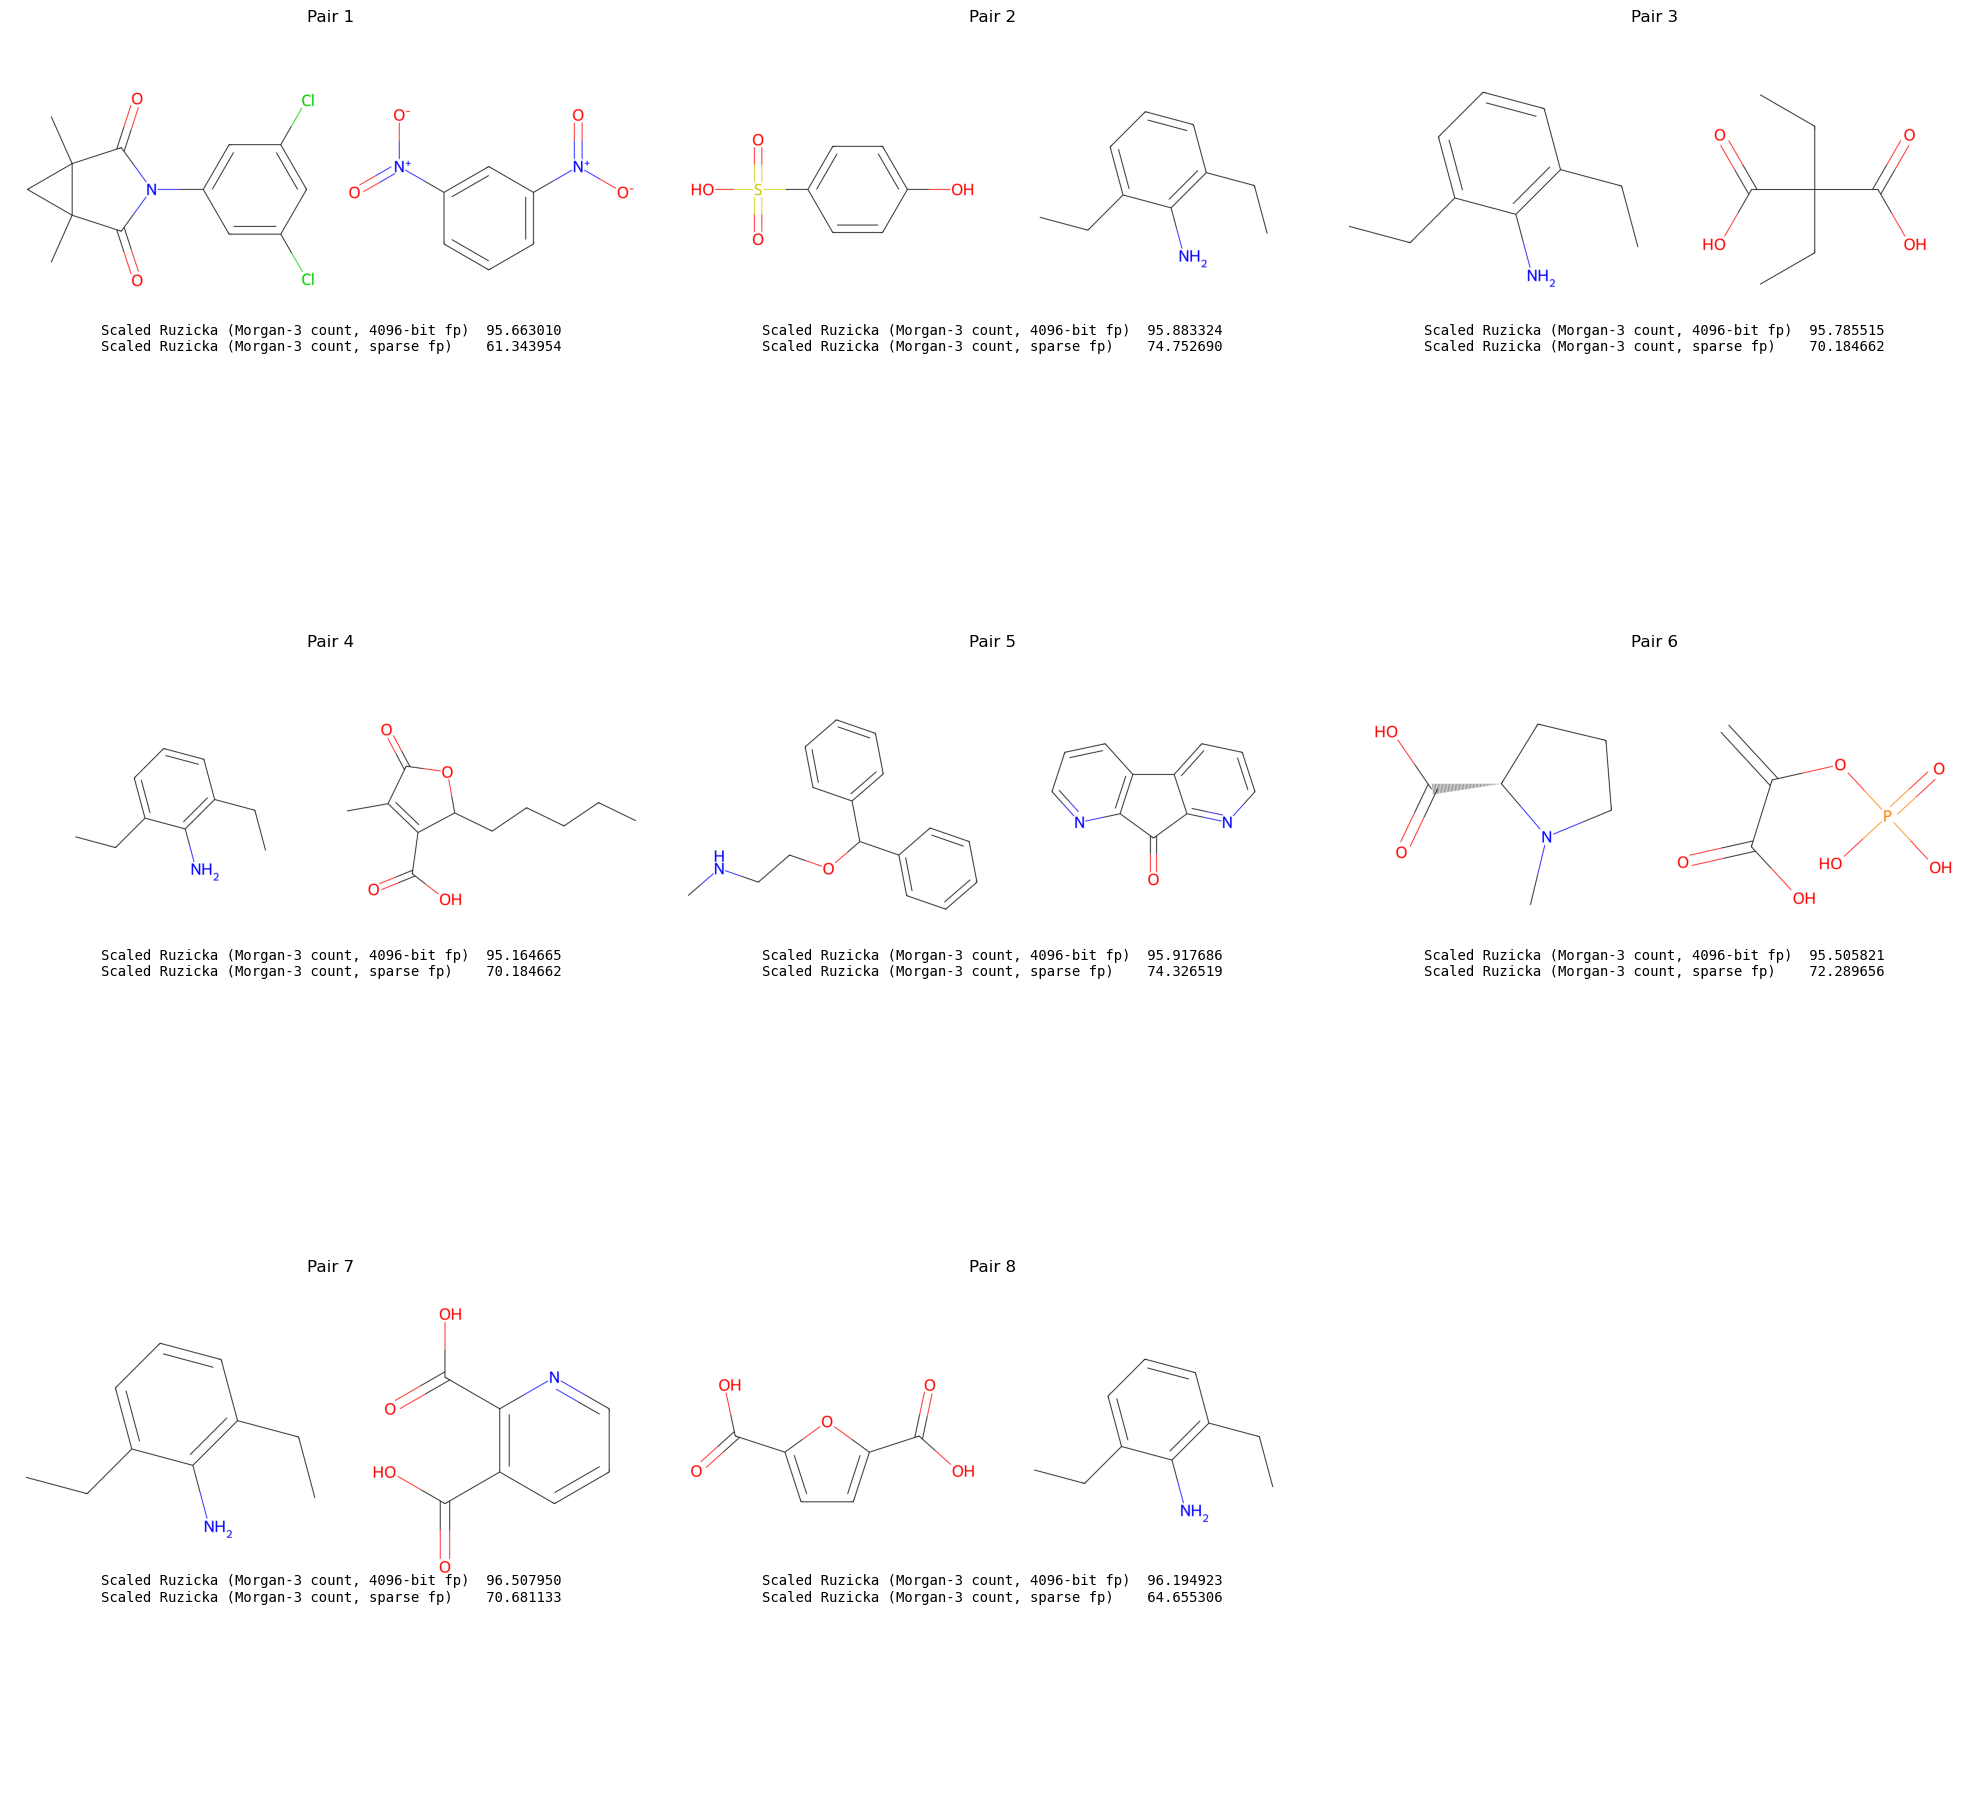

In [58]:
show_pairs_in_grid(unique_pairs, ncols=3, figsize=(20, 20), filename="morgan3_vs_sparse_examples_01.png")

In [59]:
idx = np.where((scaled_similarities_morgan3_count > 97.5) \
               & (scaled_similarities_morgan3_count_sparse < 90) \
               #& (scaled_similarities_map4 < 10)
              )
idx[0].shape

(24,)

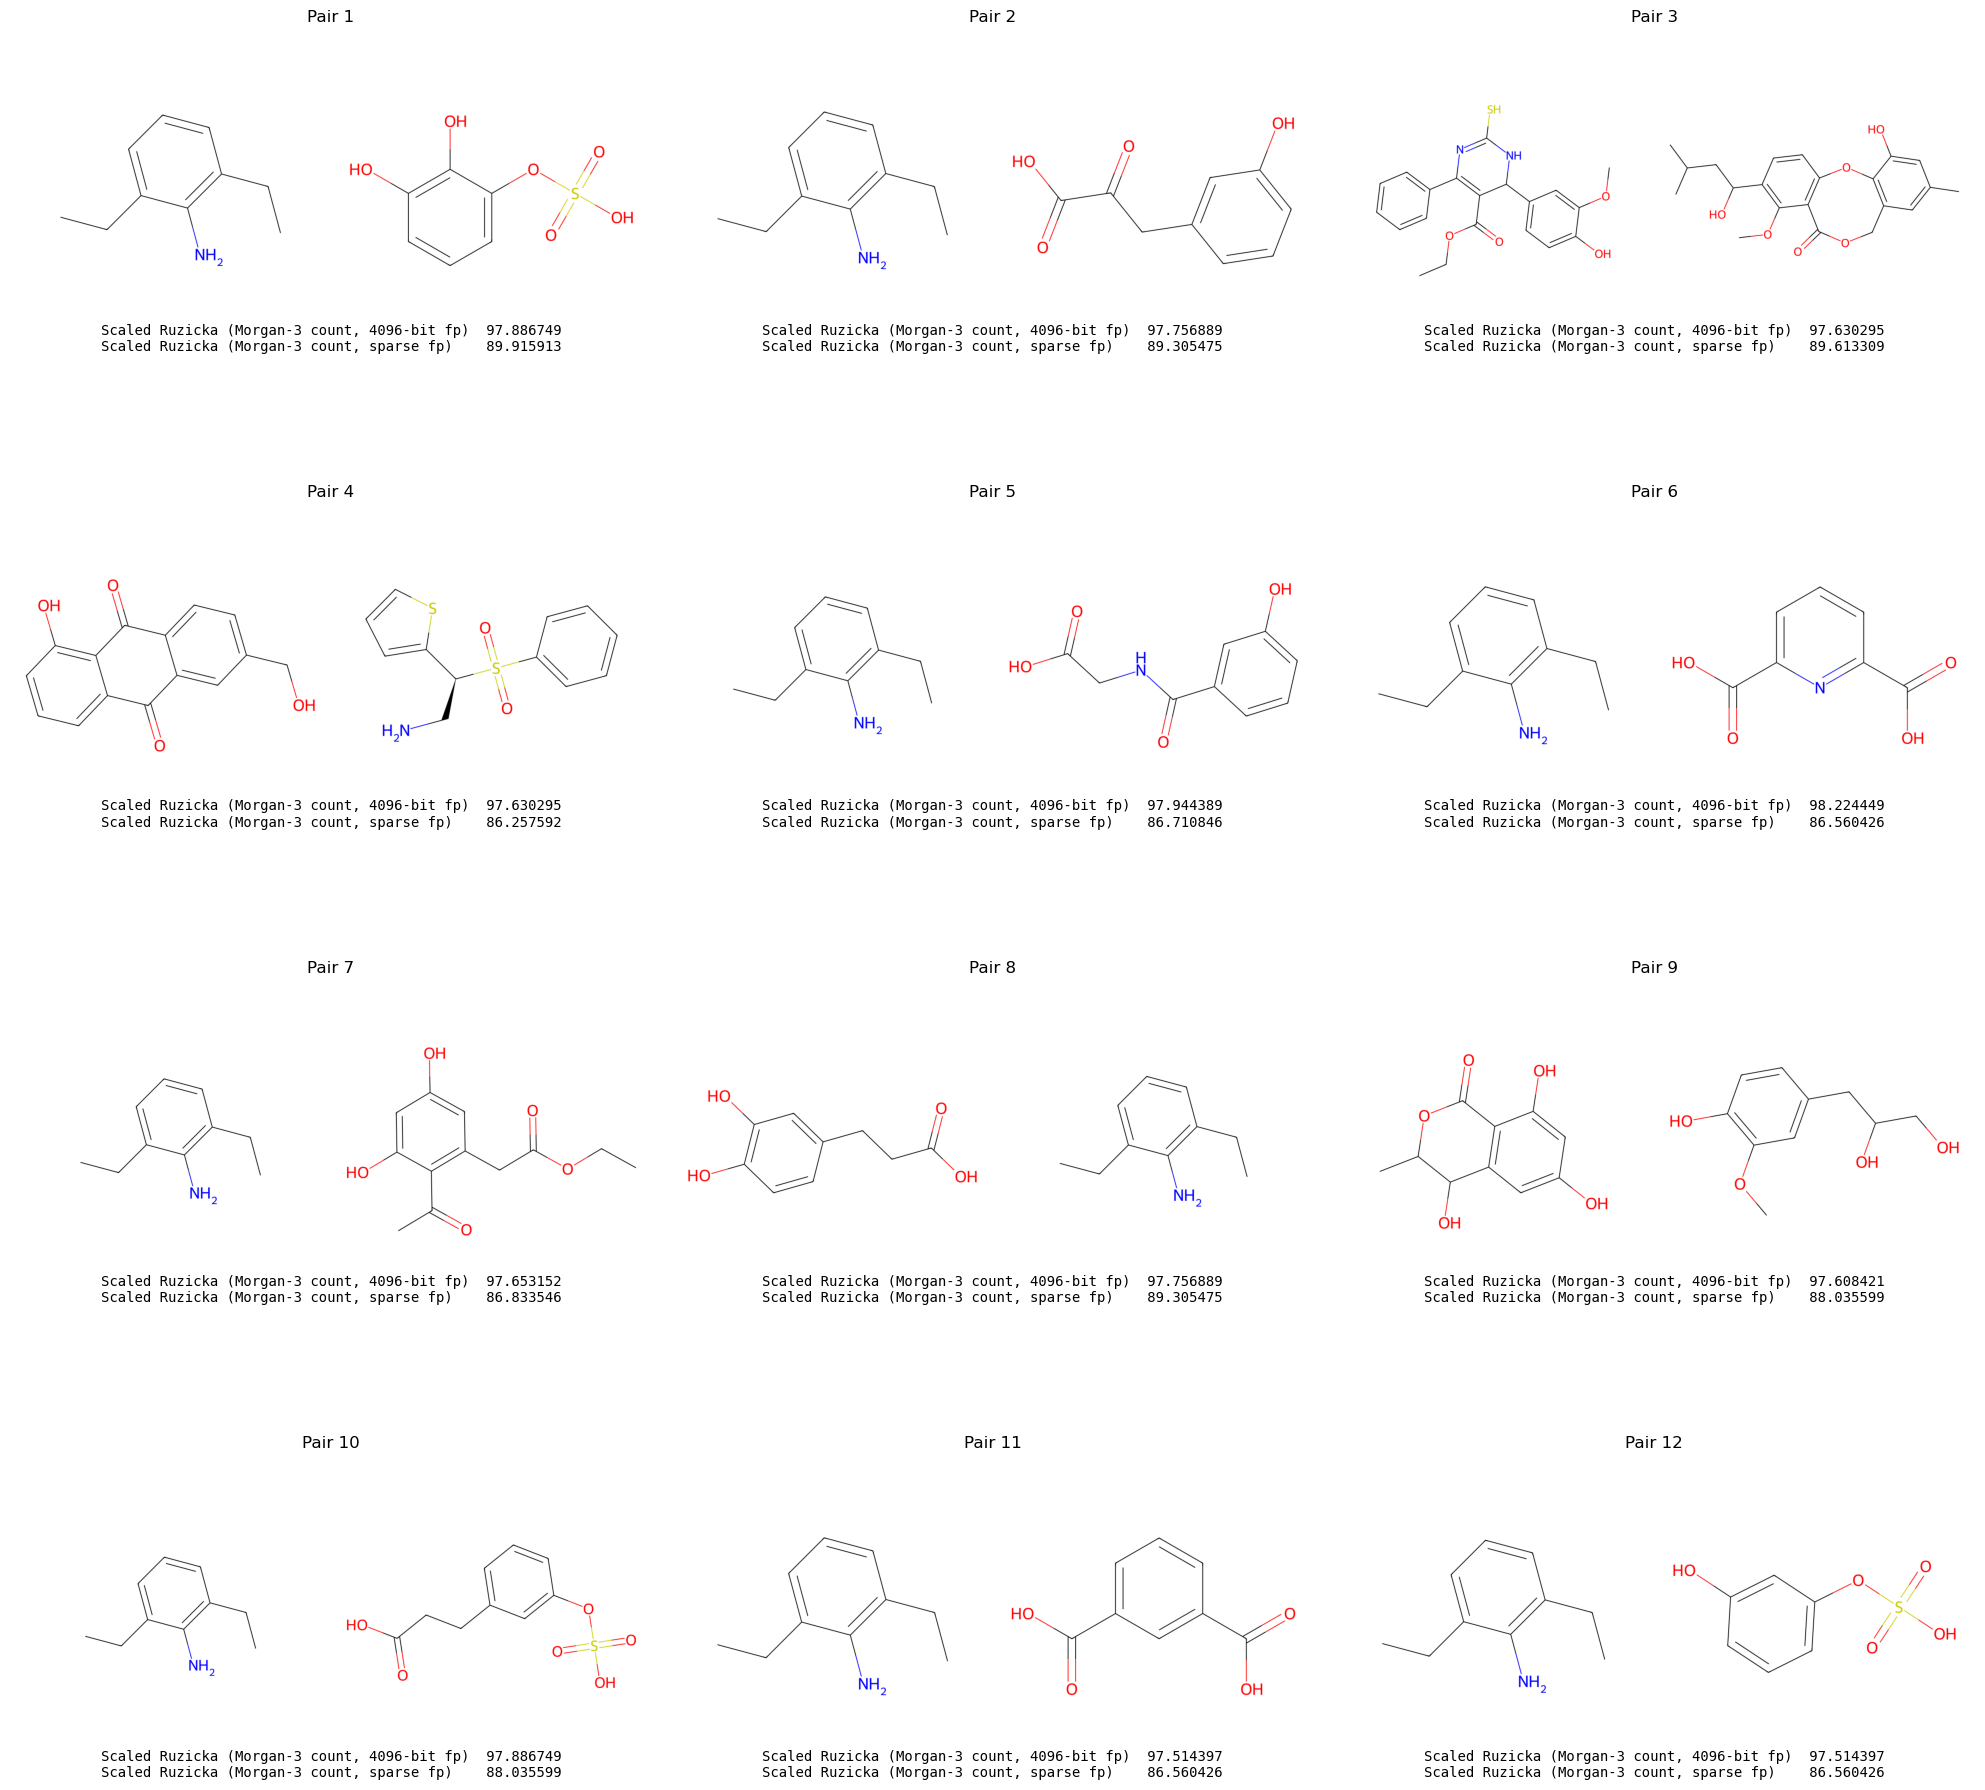

In [62]:
pairs = list(zip(idx[0], idx[1]))
unique_pairs = set()
#for pair in pairs[:10_000:1000]:
for pair in pairs[:20]:
    sorted_pair = tuple(sorted(pair))
    unique_pairs.add(sorted_pair)
unique_pairs = list(unique_pairs)

show_pairs_in_grid(unique_pairs, ncols=3, figsize=(20, 20), filename="morgan3_vs_sparse_examples_02.png")